In [692]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

## 柏市平日のトリップ

データの出典：https://www.tokyo-pt.jp/special_6th

In [693]:
data= pd.read_csv('../Workshop-data/東京都市圏PT調査.csv', encoding="shift-jis")
data.head()

,調査年,外出に関する身体的な困難さ,発ゾーン,着ゾーン,発時刻,着時刻,トリップ数
0,平成３０年,1_困難ではない,00000_柏市_1402_42200:,00000_柏市_1402_42200:,02_3時台,02_3時台,119
1,平成３０年,1_困難ではない,00000_柏市_1402_42200:,00000_柏市_1402_42200:,02_3時台,28_合計,119
2,平成３０年,1_困難ではない,00000_柏市_1402_42200:,00000_柏市_1402_42200:,05_6時台,05_6時台,110
3,平成３０年,1_困難ではない,00000_柏市_1402_42200:,00000_柏市_1402_42200:,05_6時台,28_合計,110
4,平成３０年,1_困難ではない,00000_柏市_1402_42200:,00000_柏市_1402_42200:,06_7時台,06_7時台,864


In [694]:
for col in data.columns[1:-1]:
    non_sum_col = sorted(data[col].unique())[:-1]
    print(col, non_sum_col)
    data = data[data[col].isin(non_sum_col)]

外出に関する身体的な困難さ ['1_困難ではない', '2_多少困難はあるが、一人で外出できる', '3_一部で介助者が必要', '4_常に介助者が必要', '6_不明']
発ゾーン ['00000_柏市(その他)', '00000_柏市_1402_42200:', '00000_柏市_1403_42201:', '00000_柏市_1404_42202:', '00000_柏市_1405_42210:', '00000_柏市_1406_42211:', '00000_柏市_1407_42212:', '00000_柏市_1408_42213:', '00000_柏市_1409_42220:', '00000_柏市_1410_42221:', '00000_柏市_1411_42222:', '00000_柏市_1412_42223:', '00000_柏市_1413_42230:', '00000_柏市_1414_42231:', '00000_柏市_1415_42232:', '00000_柏市_1416_42233:', '00000_柏市_1417_42240:', '00000_柏市_1418_42241:']
着ゾーン ['00000_柏市(その他)', '00000_柏市_1402_42200:', '00000_柏市_1403_42201:', '00000_柏市_1404_42202:', '00000_柏市_1405_42210:', '00000_柏市_1406_42211:', '00000_柏市_1407_42212:', '00000_柏市_1408_42213:', '00000_柏市_1409_42220:', '00000_柏市_1410_42221:', '00000_柏市_1411_42222:', '00000_柏市_1412_42223:', '00000_柏市_1413_42230:', '00000_柏市_1414_42231:', '00000_柏市_1415_42232:', '00000_柏市_1416_42233:', '00000_柏市_1417_42240:', '00000_柏市_1418_42241:']
発時刻 ['02_3時台', '03_4時台', '04_5時台', '05_6時台', '06_7時

In [695]:
# data[data['外出に関する身体的な困難さ'].isin(['3_一部で介助者が必要', '4_常に介助者が必要'])]
hard = data.groupby('外出に関する身体的な困難さ').sum()
print(hard, hard['トリップ数'].values)
print(sum(hard.values[3])/sum(hard.values[:-1]))

                      トリップ数
外出に関する身体的な困難さ              
1_困難ではない             437703
2_多少困難はあるが、一人で外出できる   13082
3_一部で介助者が必要            3820
4_常に介助者が必要             5182
6_不明                   7828 [437703  13082   3820   5182   7828]
[0.01127044]


In [696]:
time = data.groupby('発時刻').sum() 

real_time = time.iloc[:-1]
other_time = time.iloc[-1].values
real_time['ratio'] = real_time['トリップ数'].apply(lambda x: x/real_time['トリップ数'].sum())
real_time['トリップ数']+=other_time*real_time['ratio']
real_time.reset_index(inplace=True)
real_time = pd.concat([real_time.iloc[-2:], real_time.iloc[:-2]])
real_time.reset_index(inplace=True)
real_time.drop('index', axis=1, inplace=True)
real_time['時間']= real_time.index
real_time['トリップ数']= real_time['トリップ数'].apply(lambda x: int(round(x, 0)))
real_time

/var/folders/q_/t43ctg7n5mn_nwqxbyjj3_6h0000gn/T/ipykernel_42346/1071018301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_time['ratio'] = real_time['トリップ数'].apply(lambda x: x/real_time['トリップ数'].sum())
/var/folders/q_/t43ctg7n5mn_nwqxbyjj3_6h0000gn/T/ipykernel_42346/1071018301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_time['トリップ数']+=other_time*real_time['ratio']


,発時刻,トリップ数,ratio,時間
0,24_25時台,530,0.001133,0
1,25_26時台,550,0.001177,1
2,02_3時台,670,0.001433,2
3,03_4時台,1074,0.002296,3
4,04_5時台,2521,0.005391,4
5,05_6時台,11013,0.023551,5
6,06_7時台,49664,0.106207,6
7,07_8時台,39531,0.084536,7
8,08_9時台,27543,0.058902,8
9,09_10時台,27458,0.058720,9


<AxesSubplot:>

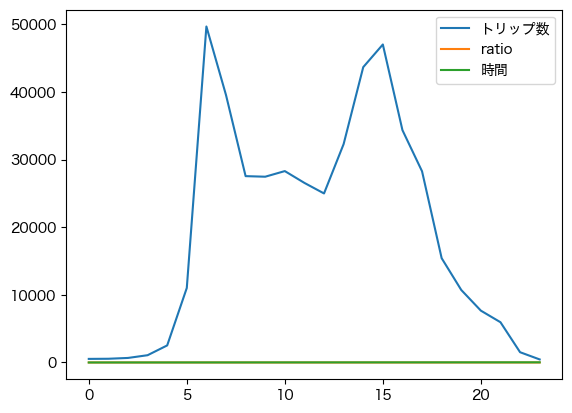

In [697]:
real_time.plot()

## 柏市休日のトリップ


データの出典：https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00600545&tstat=000001112176&cycle=0&tclass1=000001112177&tclass2val=0

柏市が調査範囲外にあるため、松戸市（三大都市圏、周辺都市1）のデータを参考にした。

調査結果のレポートによれば、一人1日当たりのトリップ数は：
平日2.17　休日1.68　なため、
休日の1日当たりのトリップ数合計は平日の77.4％とする。

In [698]:
matudo = pd.read_excel('../Workshop-data/全国都市交通特性調査.xlsx', sheet_name=1)

data = matudo.iloc[93]

data.index = matudo.iloc[2]
data = data.iloc[6:-1]
data = pd.DataFrame(data)
data.reset_index(inplace=True)
data.columns = ['時間', 'トリップ割合']
data

,時間,トリップ割合
0,～３時台,0.000244
1,３時台,0.000119
2,４時台,0.001061
3,５時台,0.002058
4,６時台,0.006855
5,７時台,0.017553
6,８時台,0.03603
7,９時台,0.054203
8,１０時台,0.089419
9,１１時台,0.090149


1. 調査は、連休となっていない日曜日を対照にしているため、24時台以降は休日ではなく、平日になるので、排除する。
2. 0時台から2時台は、〜3時台を平均に割り当て, 〜3時台を消す
3. 割合の合計が1になるように調整する。

In [699]:
# for step 1 above

data.drop([22,23,24, 25], inplace=True)

# for step 2 above
data = pd.concat([pd.DataFrame(
    [[f"{i}時台",data.iloc[0,1]/3*(0.8+i*0.2)] for i in range(3)], columns=data.columns),
                  
                  data], ignore_index=True)
data.drop([3, data.shape[0]-1], inplace=True)
data.reset_index(inplace=True, drop=True)
print(data)

data['トリップ割合'] = data['トリップ割合'].apply(lambda x: x/data['トリップ割合'].sum())

print(data['トリップ割合'].sum())
data['時間'] = data.index
data

      時間    トリップ割合
0    0時台  0.000065
1    1時台  0.000081
2    2時台  0.000098
3    ３時台  0.000119
4    ４時台  0.001061
5    ５時台  0.002058
6    ６時台  0.006855
7    ７時台  0.017553
8    ８時台   0.03603
9    ９時台  0.054203
10  １０時台  0.089419
11  １１時台  0.090149
12  １２時台  0.074655
13  １３時台  0.079045
14  １４時台  0.071755
15  １５時台  0.070025
16  １６時台  0.076861
17  １７時台  0.066617
18  １８時台  0.049279
19  １９時台  0.032161
20  ２０時台  0.020461
21  ２１時台  0.014846
22  ２２時台  0.008019
23  ２３時台  0.005503
1.0


,時間,トリップ割合
0,0,0.000075
1,1,0.000094
2,2,0.000113
3,3,0.000137
4,4,0.001224
5,5,0.002374
6,6,0.007907
7,7,0.020247
8,8,0.041561
9,9,0.062524


    weekday_trip  weekday_ratio  holiday_trip  holiday_ratio
時間                                                          
0            530       0.001133            27       0.000075
1            550       0.001177            34       0.000094
2            670       0.001433            41       0.000113
3           1074       0.002296            50       0.000137
4           2521       0.005391           443       0.001224
5          11013       0.023551           860       0.002374
6          49664       0.106207          2862       0.007907
7          39531       0.084536          7330       0.020247
8          27543       0.058902         15046       0.041561
9          27458       0.058720         22635       0.062524
10         28289       0.060495         37342       0.103146
11         26542       0.056759         37646       0.103987
12         24984       0.053429         31176       0.086115
13         32283       0.069037         33009       0.091179
14         43653       0

<AxesSubplot:xlabel='時間'>

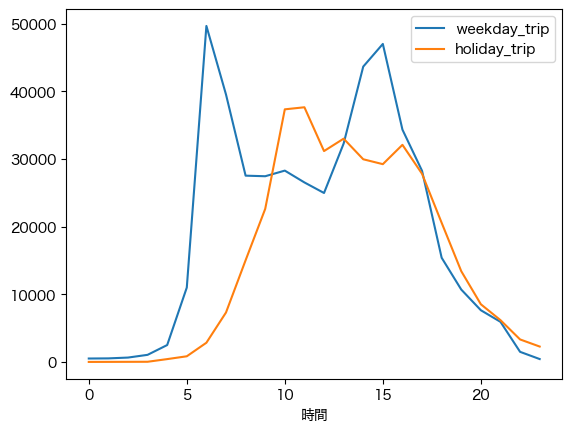

In [700]:
weekday  = real_time.copy()
holiday = data.copy()

all_data = pd.merge(weekday, holiday, on = '時間',)
all_data.rename(columns={'トリップ数':'weekday_trip',
                         'ratio':'weekday_ratio',
                         'トリップ割合':'holiday_ratio'}, inplace=True)
all_data['holiday_trip']= all_data['weekday_trip'].sum()*(1.68/2.17)*all_data['holiday_ratio']

all_data['holiday_trip']= all_data['holiday_trip'].apply(lambda x: int(round(x, 0)))

all_data = all_data[['発時刻', '時間', 'weekday_trip', 'weekday_ratio', 'holiday_trip','holiday_ratio']].drop(['発時刻'], axis=1)
all_data.set_index('時間', inplace=True)
print(all_data)
all_data[['weekday_trip', 'holiday_trip']].plot()


Make it into per 30 min.

In [701]:
all_data = pd.concat([pd.DataFrame(0,index = [0],columns=all_data.columns), all_data], ignore_index=True)
for column in ['weekday_trip', 'holiday_trip']:
    all_data[f'{column}_accumulated'] = all_data[column].cumsum()
    
all_data


,weekday_trip,weekday_ratio,holiday_trip,holiday_ratio,weekday_trip_accumulated,holiday_trip_accumulated
0,0,0.000000,0,0.000000,0,0
1,530,0.001133,27,0.000075,530,27
2,550,0.001177,34,0.000094,1080,61
3,670,0.001433,41,0.000113,1750,102
4,1074,0.002296,50,0.000137,2824,152
5,2521,0.005391,443,0.001224,5345,595
6,11013,0.023551,860,0.002374,16358,1455
7,49664,0.106207,2862,0.007907,66022,4317
8,39531,0.084536,7330,0.020247,105553,11647
9,27543,0.058902,15046,0.041561,133096,26693


In [702]:
new_df = pd.DataFrame(np.nan, index=np.arange(0.5, 24, 1), columns=all_data.columns)
df = pd.concat([all_data, new_df]).sort_index()
df[['weekday_trip_accumulated', 'holiday_trip_accumulated']] = df[['weekday_trip_accumulated', 'holiday_trip_accumulated']].interpolate(method='akima')
df['weekday_trip_accumulated_diff'] = df['weekday_trip_accumulated'].diff()
df['holiday_trip_accumulated_diff'] = df['holiday_trip_accumulated'].diff()

# Leave the first row unchanged
df.loc[0, 'weekday_trip_accumulated_diff'] = df.loc[0, 'weekday_trip_accumulated']
df.loc[0, 'holiday_trip_accumulated_diff'] = df.loc[0, 'holiday_trip_accumulated']
df

,weekday_trip,weekday_ratio,holiday_trip,holiday_ratio,weekday_trip_accumulated,holiday_trip_accumulated,weekday_trip_accumulated_diff,holiday_trip_accumulated_diff
0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
0.5,NaN,NaN,NaN,NaN,263.392857,12.625000,263.392857,12.625000
1.0,530.0,0.001133,27.0,0.000075,530.000000,27.000000,266.607143,14.375000
1.5,NaN,NaN,NaN,NaN,802.149596,43.179688,272.149596,16.179688
2.0,550.0,0.001177,34.0,0.000094,1080.000000,61.000000,277.850404,17.820312
2.5,NaN,NaN,NaN,NaN,1396.840285,80.988125,316.840285,19.988125
3.0,670.0,0.001433,41.0,0.000113,1750.000000,102.000000,353.159715,21.011875
3.5,NaN,NaN,NaN,NaN,2232.153065,124.856835,482.153065,22.856835
4.0,1074.0,0.002296,50.0,0.000137,2824.000000,152.000000,591.846935,27.143165
4.5,NaN,NaN,NaN,NaN,3873.533284,316.859564,1049.533284,164.859564


<AxesSubplot:>

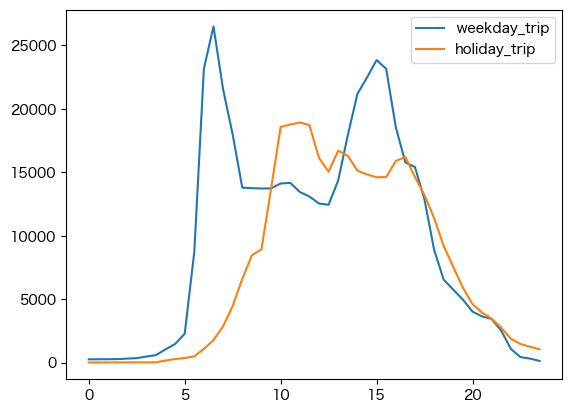

In [703]:

# Replace original columns with these differences
df['weekday_trip'] = df['weekday_trip_accumulated_diff']
df['holiday_trip']=df['holiday_trip_accumulated_diff']

df.index= [-1]+df.index[:-1].tolist()
df.drop(-1, inplace=True)

df['weekday_ratio'] = df['weekday_trip']/df['weekday_trip'].sum()
df['holiday_ratio'] = df['holiday_trip']/df['holiday_trip'].sum()

df['weekday_trip'] = df['weekday_trip'].apply(lambda x: int(round(x, 0)))
df['holiday_trip'] = df['holiday_trip'].apply(lambda x: int(round(x, 0)))
df[['weekday_trip', 'holiday_trip']].plot()

In [704]:
df = pd.DataFrame(pd.concat([df['weekday_trip'], df['holiday_trip']], axis=0, ignore_index=True), columns=['トリップ数'])
df['weekday'] = pd.Series([1]*48+[0]*48)

times = [f'{h:02d}:{m:02d}' for h in range(24) for m in [0, 30]]
df['時間'] = times*2
print(df)
df.to_csv('trip_data.csv', index=False)

    トリップ数  weekday     時間
0     263        1  00:00
1     267        1  00:30
2     272        1  01:00
3     278        1  01:30
4     317        1  02:00
..    ...      ...    ...
91   2746        0  21:30
92   1881        0  22:00
93   1468        0  22:30
94   1250        0  23:00
95   1048        0  23:30

[96 rows x 3 columns]
